<a href="https://colab.research.google.com/github/Kevin4033/Bioinformatics/blob/main/ML_Internship_studio_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Machine Learning Model Application on Student Performance**



**Description:**
This project aims to understand how the student's performance (test
scores) is affected by other variables such as Gender, Ethnicity,
Parental level of education, Lunch and Test preparation course.

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Machine Learning/StudentsPerformance_3_lyst1729690388778.csv')  # Replace with your dataset path

# Check the shape and data types
print(df.shape)
print(df.dtypes)

(1000, 8)
gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object


In [ ]:
#Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
import warnings

In [ ]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


**Show Top 5 records**

In [ ]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


**Preparing X and Y variables**

In [ ]:
X= df.drop(['math score'], axis=1)
X.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [ ]:
Y= df['math score']
Y.head()

,math score
0,72
1,69
2,90
3,47
4,76


In [ ]:
for i in df.columns:
  if df[i].dtype == 'object':
    print(f"{i}: \n {df[i].unique()} ")


gender: 
 ['female' 'male'] 
race/ethnicity: 
 ['group B' 'group C' 'group A' 'group D' 'group E'] 
parental level of education: 
 ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school'] 
lunch: 
 ['standard' 'free/reduced'] 
test preparation course: 
 ['none' 'completed'] 


In [ ]:
# Creation of transformer columns
num_col=X.select_dtypes(exclude='object').columns
cat_col=X.select_dtypes(include='object').columns

In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [ ]:
num_trans=StandardScaler()
cat_trans=OneHotEncoder()

preprocessor=ColumnTransformer([
    ('OneHotEncoder', cat_trans, cat_col),
    ('StandardScaler', num_trans, num_col)
])

In [ ]:
x=preprocessor.fit_transform(X)

In [ ]:
x.shape

(1000, 19)

In [ ]:
#Seperating Train and test data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, Y, test_size=0.2, random_state=42)

In [ ]:
#Create an Evaluate function to give all metrics after model training

def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2= r2_score(true, predicted)
    return mae, mse, rmse, r2

In [ ]:
models={
    'LR': LinearRegression(),
    'Lasso': Lasso(),
    'Ridge': Ridge(),
    'KNN': KNeighborsRegressor(),
    'DT': DecisionTreeRegressor(),
    'RF': RandomForestRegressor(),
}

In [ ]:
model_list=[]
r2_list=[]

for i in range (len(list(models))):
  model=list(models.values())[i] #Get Model
  model.fit(X_train, y_train) #Train Model

  #Make Predictions
  y_train_pred=model.predict(X_train)
  y_test_pred=model.predict(X_test)

  #Evaluate Train and Test Dataset
  model_train_mae, model_train_mse, model_train_rmse, model_train_r2=evaluate_model(y_train, y_train_pred)
  model_test_mae, model_test_mse, model_test_rmse, model_test_r2=evaluate_model(y_test, y_test_pred)

  print(list(models.keys())[i])
  model_list.append(list(models.keys())[i])

  print('Model performance for Training set')
  print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
  print("- Mean Squared Error: {:.4f}".format(model_train_mse))
  print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
  print("- R2 Score: {:.4f}".format(model_train_r2))
  print('----------------------------------')

  print('Model performance for Test set')
  print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
  print("- Mean Squared Error: {:.4f}".format(model_test_mse))
  print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
  print("- R2 Score: {:.4f}".format(model_test_r2))
  r2_list.append(model_test_r2)

  print('='*35)
  print('\n')

LR
Model performance for Training set
- Root Mean Squared Error: 5.3231
- Mean Squared Error: 28.3349
- Mean Absolute Error: 4.2667
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3940
- Mean Squared Error: 29.0952
- Mean Absolute Error: 4.2148
- R2 Score: 0.8804


Lasso
Model performance for Training set
- Root Mean Squared Error: 6.5938
- Mean Squared Error: 43.4784
- Mean Absolute Error: 5.2063
- R2 Score: 0.8071
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.5197
- Mean Squared Error: 42.5064
- Mean Absolute Error: 5.1579
- R2 Score: 0.8253


Ridge
Model performance for Training set
- Root Mean Squared Error: 5.3233
- Mean Squared Error: 28.3378
- Mean Absolute Error: 4.2650
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3904
- Mean Squared Error: 29.0563
- Mean Absolute Error: 4.2111
- R2 Score: 0.8806


# **Result**

In [ ]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=['R2_Score'],ascending=False)

,Model Name,R2_Score
2,Ridge,0.880593
0,LR,0.880433
5,RF,0.850663
1,Lasso,0.825320
3,KNN,0.782192
4,DT,0.761176


**Key Observations:**

1.   ***Ridge Regression (Best Model)***:
*   Ridge regression achieved the highest R2 score of 0.8806.
*   This suggests that Ridge's regularization effectively mitigates overfitting compared to Linear Regression (LR), while maintaining a high level of predictive power.

2.   ***Linear Regression (Second Best)***:
*   Linear Regression (LR) performed almost as well as Ridge, with an R2 score of 0.8804.
*   The similarity in performance between Ridge and LR indicates that the dataset might not have severe multicollinearity or overfitting issues, though Ridge offers slight improvement.

3.   ***Random Forest (RF)***:

*   Random Forest achieved an R2 score of 0.8507, slightly lower than Ridge and LR.
*   This suggests that while RF captures non-linear relationships, its ensemble nature might lead to overfitting or less generalization in this case.

4.   ***Lasso Regression:***
*   Lasso, with an R2 score of 0.8253, performed worse than Ridge and LR.
*   Lasso applies L1 regularization, which can shrink some coefficients to zero. The drop in R2 indicates that some features excluded by Lasso were important for prediction.

5.   ***K-Nearest Neighbors (KNN):***
*   KNN achieved an R2 score of 0.7822, which is lower than the linear and ensemble models.
*   KNN struggles with high-dimensional data and might not capture global relationships effectively in this context.

6.   ***Decision Tree (DT):***
*   The Decision Tree had the lowest R2 score of 0.7612.
*   Decision Trees tend to overfit small datasets or those with noise, leading to reduced generalization.

**Conclusion:**
*   Ridge Regression is the best-performing model in this comparison, offering a balance of simplicity, interpretability, and performance. It slightly outperforms Linear Regression by addressing potential multicollinearity and overfitting issues.
*   Random Forest is a strong non-linear model but is outperformed by Ridge and LR in this scenario.
*   The results suggest that the dataset may not have significant non-linear patterns, favoring linear models over tree-based or distance-based approaches like KNN and DT.


##***Ridge***

In [ ]:
# Define the Ridge regression model
ridge_model = Ridge(alpha=1.0, fit_intercept=True)  # You can adjust alpha for regularization strength

# Fit the model on the training data
ridge_model = ridge_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = ridge_model.predict(X_test)

# Calculate R^2 score
score = r2_score(y_test, y_pred) * 100
print("R2 score of the Ridge Regression model is %.2f" % score)

R2 score of the Ridge Regression model is 88.06


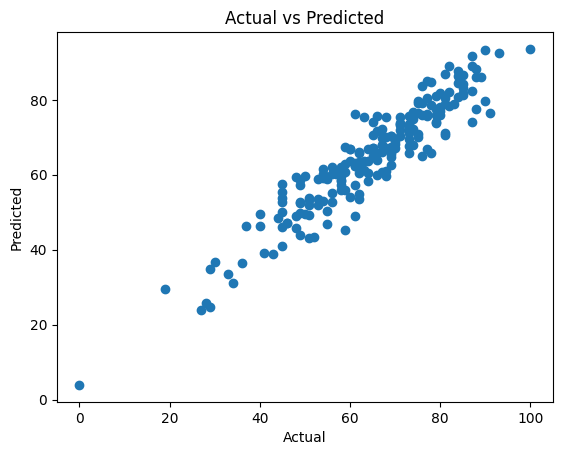

In [ ]:
plt.scatter(y_test, y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');
plt.title('Actual vs Predicted');


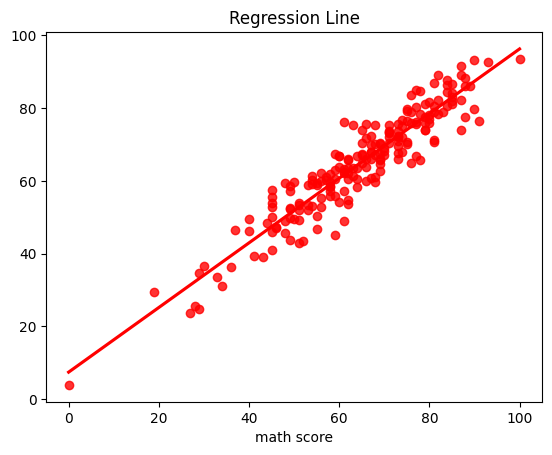

In [ ]:
# Regression plot with seaborn
sns.regplot(x=y_test, y=y_pred, ci=None, color='red');
plt.title('Regression Line');

In [ ]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,91,76.387970,14.612030
737,53,58.885970,-5.885970
740,80,76.990265,3.009735
660,74,76.851804,-2.851804
411,84,87.627378,-3.627378
...,...,...,...
408,52,43.409149,8.590851
332,62,62.152214,-0.152214
208,74,67.888395,6.111605
613,65,67.022287,-2.022287


## ***Linear Regression***

In [ ]:
lin_model=LinearRegression(fit_intercept=True)
lin_model=lin_model.fit(X_train, y_train)
y_pred=lin_model.predict(X_test)
score=r2_score(y_test, y_pred)*100
print("R2 score of the model is %.2f" %score)

R2 score of the model is 88.04


**Plot y_pred and y_test**

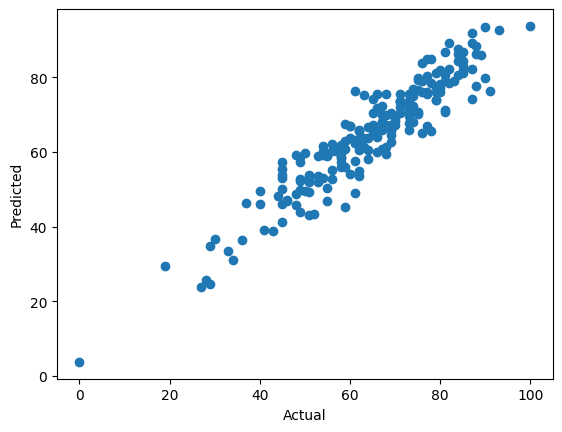

In [ ]:
plt.scatter(y_test, y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

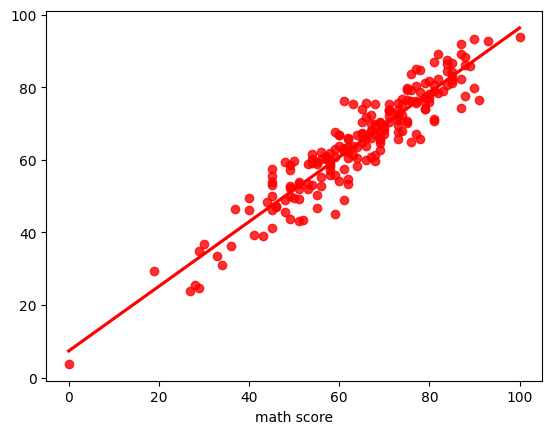

In [ ]:
sns.regplot(x=y_test, y=y_pred, ci=None, color ='red');

**Difference between Actual value and Predicted value**

In [ ]:
pred_df = pd.DataFrame({'Actual Value': y_test, 'Predicted Value': y_pred, 'Difference': y_test - y_pred})
print(pred_df)

     Actual Value  Predicted Value  Difference
521            91        76.398705   14.601295
737            53        58.842469   -5.842469
740            80        76.992129    3.007871
660            74        76.805898   -2.805898
411            84        87.615387   -3.615387
..            ...              ...         ...
408            52        43.492293    8.507707
332            62        62.170763   -0.170763
208            74        67.910325    6.089675
613            65        67.061504   -2.061504
78             61        62.427189   -1.427189

[200 rows x 3 columns]
